<a href="https://colab.research.google.com/github/JOSEPHINEGEND/R-project-to-predict-whether-a-user-will-click-an-Ad./blob/master/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Research Question

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to create a solution that would allow her to determine whether ads targeted to audiences of certain characteristics i.e. city, male country, ad topic, etc. would click on her ads. Ceate a prediction model that more accurately predicts whether a user will click an Ad.

* Experimental Design

1. Data Exploration/Cleaning
2. Model Training
3. Model Prediction
4. Model Evaluation


In [0]:
install.packages("ggcorrplot")

package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Josephine\AppData\Local\Temp\RtmpyIgHUR\downloaded_packages


In [0]:
# Importing Libraries we need for this Project analysis

library(tidyverse)
library(data.table)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose



In [0]:
# Reading a csv file
adv <-read_csv("http://bit.ly/IPAdvertisingData")

Parsed with column specification:
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)


In [0]:
# Viewing the top observations
head(adv)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [0]:
# Viewing the bottom observations
tail(adv)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [0]:
# Checking the number of rows and columns
dim(adv)

[1] 1000   10

There are 1000 rows and 10 columns.

In [0]:
# checking the types of attributes (columns)
sapply(adv, class)

$`Daily Time Spent on Site`
[1] "numeric"

$Age
[1] "numeric"

$`Area Income`
[1] "numeric"

$`Daily Internet Usage`
[1] "numeric"

$`Ad Topic Line`
[1] "character"

$City
[1] "character"

$Male
[1] "numeric"

$Country
[1] "character"

$Timestamp
[1] "POSIXct" "POSIXt" 

$`Clicked on Ad`
[1] "numeric"

In [0]:
# checking the summary statistics of the dataset
summary(adv)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [0]:
# A summary information of the dataset
glimpse(adv)

Observations: 1,000
Variables: 10
$ `Daily Time Spent on Site` <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99...
$ Age                        <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, ...
$ `Area Income`              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, ...
$ `Daily Internet Usage`     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, ...
$ `Ad Topic Line`            <chr> "Cloned 5thgeneration orchestration", "M...
$ City                       <chr> "Wrightburgh", "West Jodi", "Davidton", ...
$ Male                       <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0...
$ Country                    <chr> "Tunisia", "Nauru", "San Marino", "Italy...
$ Timestamp                  <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:0...
$ `Clicked on Ad`            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0...


The glimpse output shows the datatypes of each column and a few observations.

# DATA CLEANING

In [0]:
# Completeness:
# Checking for missing values

colSums(is.na(adv))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

There are no missing values in the dataset from the output.

In [0]:
# checking for duplicates
# The function distinct() [dplyr package] can be used to keep only unique/distinct rows from a data frame.
# If there are duplicate rows, only the first row is preserved. 
# It’s an efficient version of the R base function unique().

# unique(adv)
#distinct(adv)

## Fixing spaces in the column names

In [0]:
# Checking the column names
names(adv)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [0]:
# Replacing spaces in the columns names with an underscore
names(adv) <- gsub(" ", "_", names(adv))

In [0]:
# Confirming the columns names have changed
names(adv) 

[1] "Daily_Time_Spent_on_Site" "Age"                     
 [3] "Area_Income"              "Daily_Internet_Usage"    
 [5] "Ad_Topic_Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked_on_Ad"

# Outliers

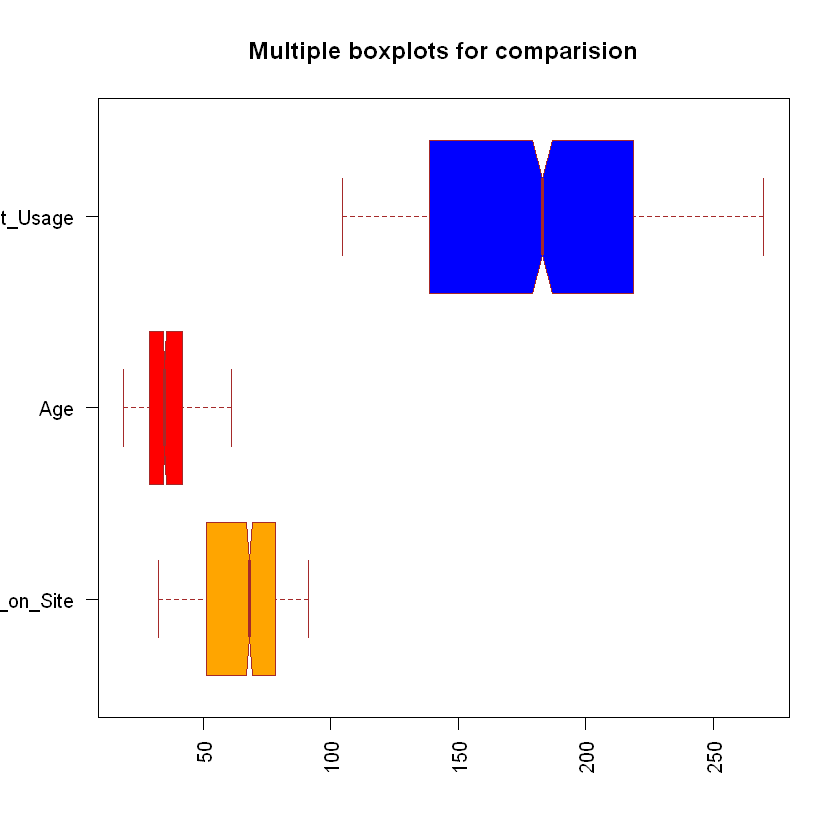

In [0]:
# Using a boxplot to check for observations far away from other data points.
# Using all three double type columns

Daily_Time_Spent_on_Site <- adv$Daily_Time_Spent_on_Site
Age <- adv$Age
Daily_Internet_Usage <- adv$Daily_Internet_Usage
 

boxplot(Daily_Time_Spent_on_Site,Age, Daily_Internet_Usage,
main = "Multiple boxplots for comparision",
at = c(1,2,3),
names = c("Daily_Time_Spent_on_Site", "Age","Daily_Internet_Usage"),
las = 2,
col = c("orange","red","blue"),
border = "brown",
horizontal = TRUE,
notch = TRUE
)


There are no outliers in the three features plotted

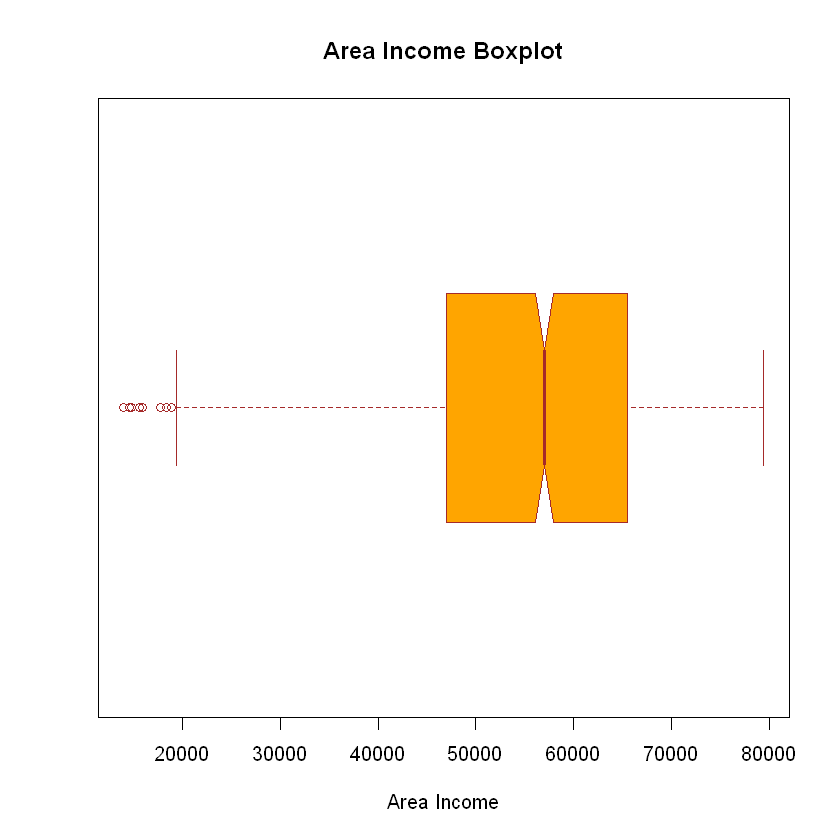

In [0]:
# Boxplot for the Area Income
boxplot(adv$Area_Income,
main = "Area Income Boxplot",
xlab = "Area Income",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE
)


There are a few outliers on the first quartile of the are income boxplot.

# Visualizations

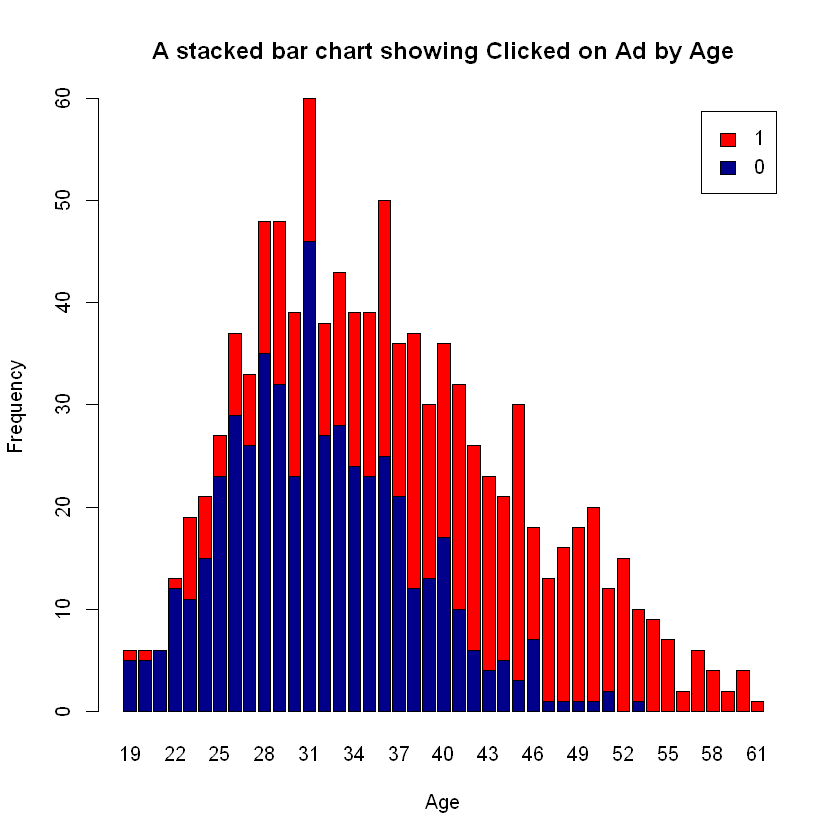

In [0]:
# Stacked bar chart

counts <- table(adv$Clicked_on_Ad, adv$Age)
barplot(counts,
  main="A stacked bar chart showing Clicked on Ad by Age",
  xlab="Age",
  ylab = "Frequency",
  col=c("darkblue","red"),
  legend = rownames(counts))

* The stacked bar chart shows the distribution of the number of people who clicked on an Ad by age.
* The highest age of the participants was 61 and lowest was 19.
* The people who cliked most on Ads were between age 28 to 36.

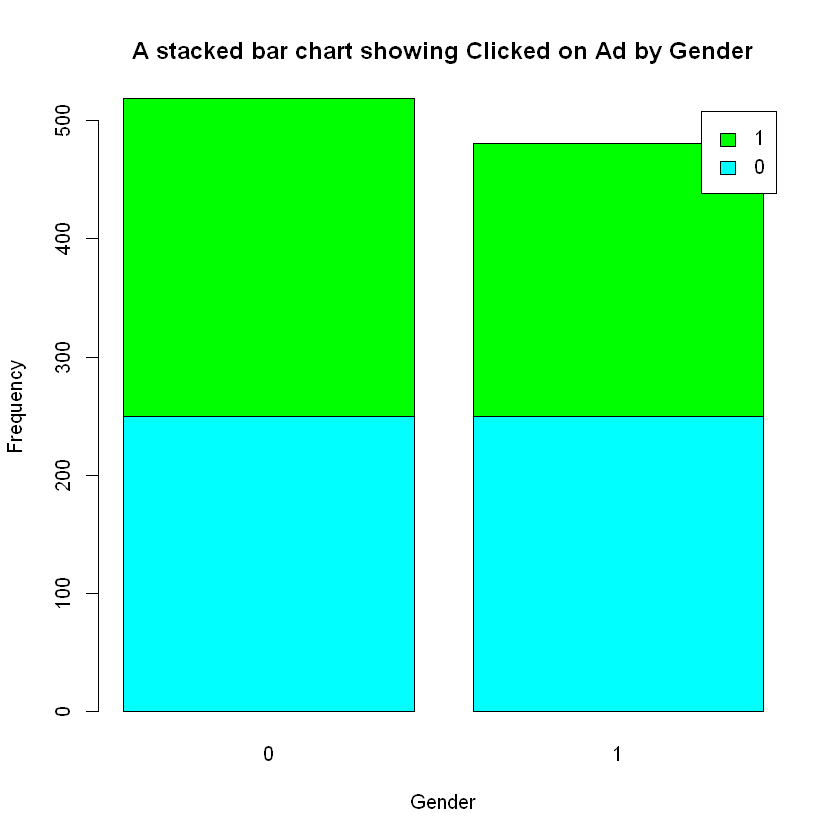

In [0]:
# Stacked bar chart

counts <- table(adv$Clicked_on_Ad, adv$Male)
barplot(counts,
  main="A stacked bar chart showing Clicked on Ad by Gender",
  xlab="Gender",
  ylab = "Frequency",
  col=c("cyan","green"),
  legend = rownames(counts))

In [0]:
* There are slightly more females than males in the dataset.
* More females clicked on Ad compared to males.

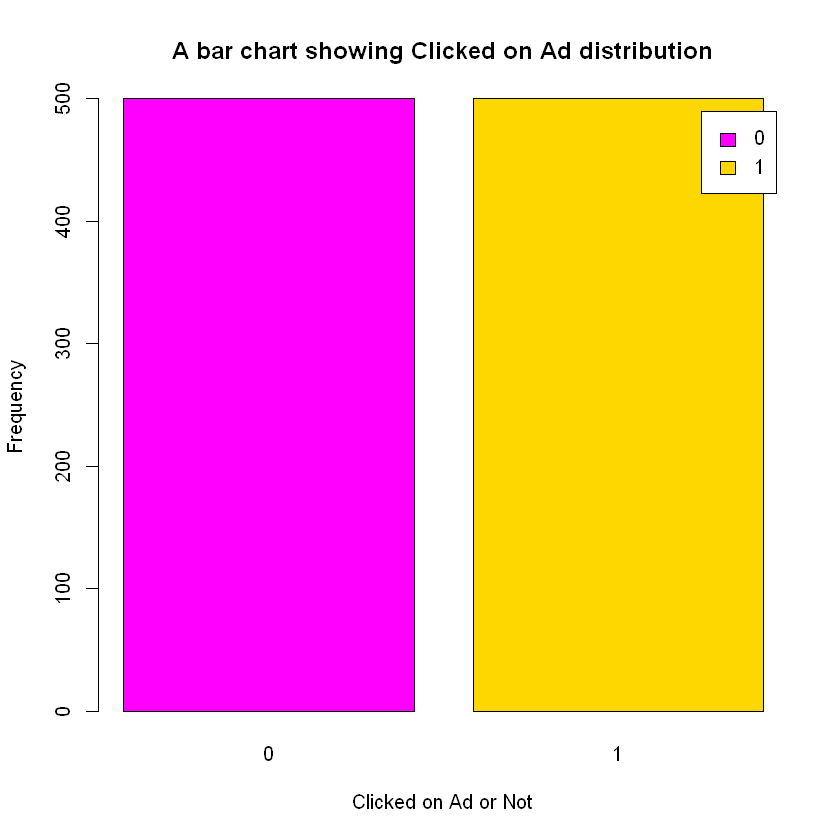

In [0]:
# Bar chart of the target variable

counts <- table(adv$Clicked_on_Ad)
barplot(counts,
  main="A bar chart showing Clicked on Ad distribution",
  xlab="Clicked on Ad or Not",
  ylab = "Frequency",
  col=c("magenta","gold"),
  legend = rownames(counts))

* The data is balanced since the number of people who clicked on Ad and those who did not are equal.


Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

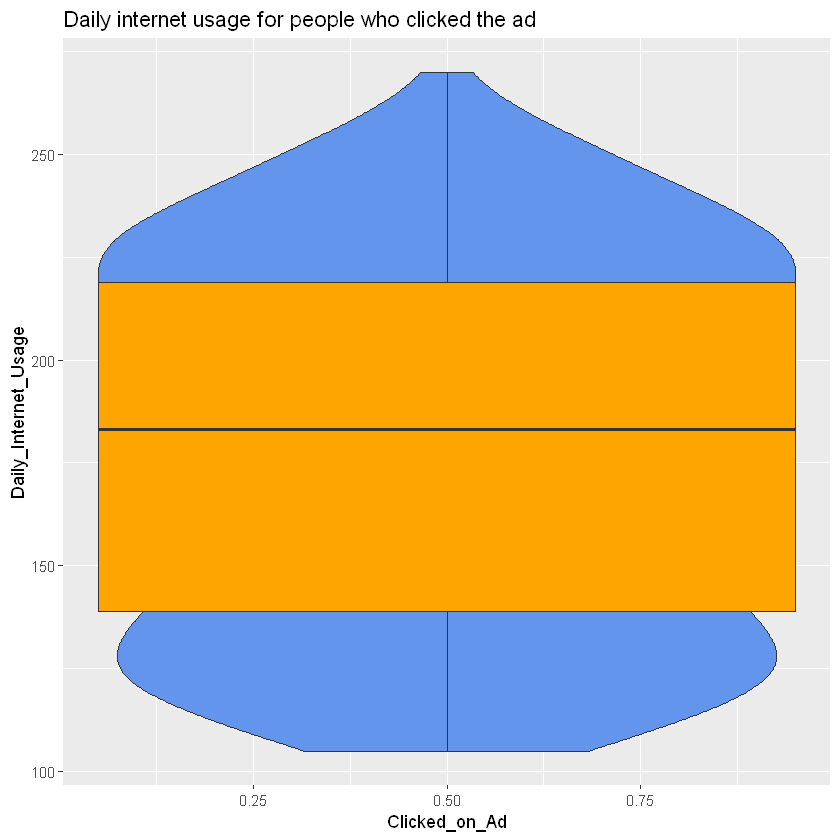

In [0]:
# A violin plot

ggplot(adv, 
       aes(x = Clicked_on_Ad, 
           y = Daily_Internet_Usage)) +
  geom_violin(fill = "cornflowerblue") +
  geom_boxplot(width = .2, 
               fill = "orange",
               outlier.color = "orange",
               outlier.size = 2) + 
  labs(title = "Daily internet usage for people who clicked the ad")

* People who click on Ad spend Daily internet amount between 135 and 220.
* There are no outliers.

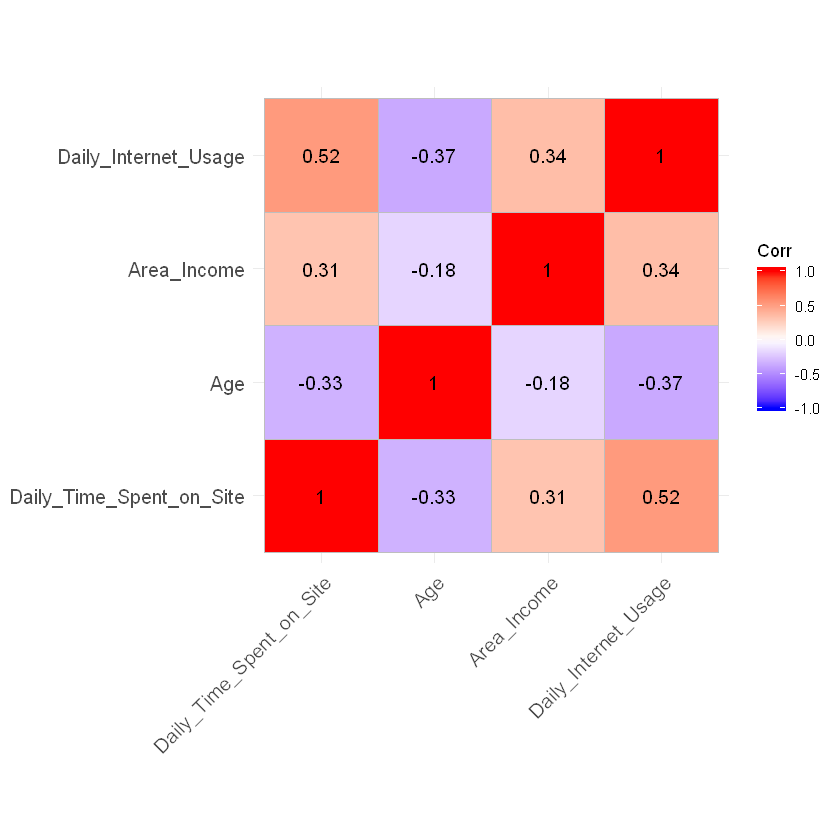

In [0]:
# Heat map
# Numeric variables
numeric_tbl <- adv %>%
  select_if(is.numeric) %>%
  select(Daily_Time_Spent_on_Site, Age, Area_Income,Daily_Internet_Usage)

# Calculate the correlations
corr <- cor(numeric_tbl, use = "complete.obs")

ggcorrplot(round(corr, 2), 
           type = "full", lab = T)

* There is a moderate relationship between daily time spent on the site and and daily internet usage.
* Other variables have weak relationships.

# MODELLING

In [0]:
# Instaling packages we need for modelling
# These packages are useful while using Support Vector Classification model

install.packages("e1071")
library(e1071)
install.packages("kernlab")
library(kernlab)

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Josephine\AppData\Local\Temp\RtmpyIgHUR\downloaded_packages
package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Josephine\AppData\Local\Temp\RtmpyIgHUR\downloaded_packages



Attaching package: 'kernlab'

The following object is masked from 'package:purrr':

    cross

The following object is masked from 'package:ggplot2':

    alpha



In [0]:
glimpse(adv)

Observations: 1,000
Variables: 10
$ Daily_Time_Spent_on_Site <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, ...
$ Age                      <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49...
$ Area_Income              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73...
$ Daily_Internet_Usage     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 22...
$ Ad_Topic_Line            <chr> "Cloned 5thgeneration orchestration", "Mon...
$ City                     <chr> "Wrightburgh", "West Jodi", "Davidton", "W...
$ Male                     <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...
$ Country                  <chr> "Tunisia", "Nauru", "San Marino", "Italy",...
$ Timestamp                <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:02,...
$ Clicked_on_Ad            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...


In [0]:
# Converting the target and Male varible as factor

adv$Clicked_on_Ad = factor(adv$Clicked_on_Ad, levels = c(0,1))
adv$Male = factor(adv$Male, levels = c(0,1))

sapply(adv, class)

$Daily_Time_Spent_on_Site
[1] "numeric"

$Age
[1] "numeric"

$Area_Income
[1] "numeric"

$Daily_Internet_Usage
[1] "numeric"

$Ad_Topic_Line
[1] "character"

$City
[1] "character"

$Male
[1] "factor"

$Country
[1] "character"

$Timestamp
[1] "POSIXct" "POSIXt" 

$Clicked_on_Ad
[1] "factor"

In [0]:
# Splitting the dataset